In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.plotly as py
import plotly.graph_objs as go
import folium
from folium import plugins
import seaborn as sns

#plotly.__version__
#plotly.tools.set_credentials_file(username='jordanvi', api_key='eWMeFHaplpUZvrjlAUZ9')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [25]:
from subprocess import check_output
print(check_output(["ls", "data/"]).decode("utf8"))

air_reserve.csv.zip
air_store_info.csv.zip
air_visit_data.csv.zip
date_info.csv.zip
hpg_reserve.csv.zip
hpg_store_info.csv.zip
sample_submission.csv.zip
store_id_relation.csv.zip



In [26]:
# Loading data
data = {
    'train': pd.read_csv('data/air_visit_data.csv.zip', compression="zip"),
    'air_store_info': pd.read_csv('data/air_store_info.csv.zip', compression="zip"),
    'hpg_store_info': pd.read_csv('data/hpg_store_info.csv.zip', compression="zip"),
    'air_reserve': pd.read_csv('data/air_reserve.csv.zip', compression="zip"),
    'hpg_reserve': pd.read_csv('data/hpg_reserve.csv.zip', compression="zip"),
    'store_id_relation': pd.read_csv('data/store_id_relation.csv.zip', compression="zip"),
    'test': pd.read_csv('data/sample_submission.csv.zip', compression="zip"),
    'date_info': pd.read_csv('data/date_info.csv.zip', compression="zip").rename(columns={'calendar_date':'visit_date'})
    }

In [27]:
data['hpg_reserve'].tail(5)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9
2000319,hpg_0b70de808b55ad1e,2017-05-31 23:00:00,2017-04-21 13:00:00,6


In [28]:
# bring air id to hpg reserve data
data['hpg_reserve'] = pd.merge(data['hpg_reserve'], data['store_id_relation'], how='inner', on=['hpg_store_id'])
# bring air id to hpg stores
data['hpg_store_info'] = pd.merge(data['hpg_store_info'], data['store_id_relation'], how='inner', on=['hpg_store_id'])

In [29]:
data['hpg_reserve'].tail(5)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id
28178,hpg_0f78ef8d1e4b23d8,2017-04-01 21:00:00,2017-03-10 20:00:00,2,air_84f6876ff7e83ae7
28179,hpg_0f78ef8d1e4b23d8,2017-04-02 17:00:00,2017-04-02 14:00:00,2,air_84f6876ff7e83ae7
28180,hpg_0f78ef8d1e4b23d8,2017-04-08 19:00:00,2017-04-03 12:00:00,3,air_84f6876ff7e83ae7
28181,hpg_0f78ef8d1e4b23d8,2017-04-08 20:00:00,2017-03-09 07:00:00,4,air_84f6876ff7e83ae7
28182,hpg_0f78ef8d1e4b23d8,2017-04-28 18:00:00,2017-04-10 22:00:00,5,air_84f6876ff7e83ae7


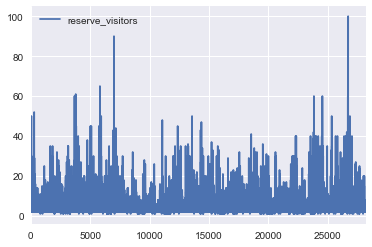

In [8]:
data['hpg_reserve'].plot()

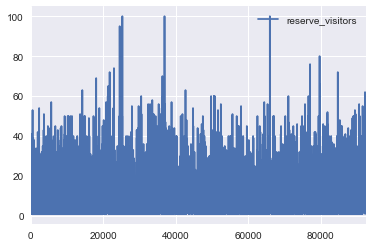

In [9]:
data['air_reserve'].plot()

In [10]:
#data['hpg_reserve'].reserve_visitors.plot(kind = 'bar', color = 'y',label = 'Speed',linewidth=1,alpha = 0.9,grid = True,linestyle = ':')

In [30]:
data['hpg_reserve'].describe()

,reserve_visitors
count,28183.000000
mean,4.364120
std,4.689755
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [ ]:
#correlation map
#f,ax = plt.subplots(figsize=(8,8))
#sns.heatmap(data['air_store_info'].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [31]:
data['air_reserve'].reserve_visitors.count()

92378

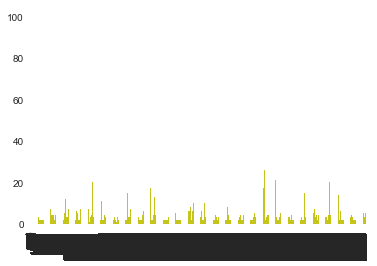

In [12]:
#data['air_reserve'].reserve_visitors.plot(kind = 'bar', color = 'y',label = 'Speed',linewidth=1,alpha = 0.9,grid = True,linestyle = ':')

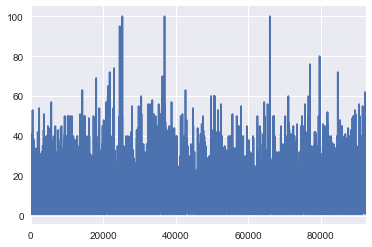

In [18]:
data['air_reserve'].reserve_visitors.plot(kind = 'line')

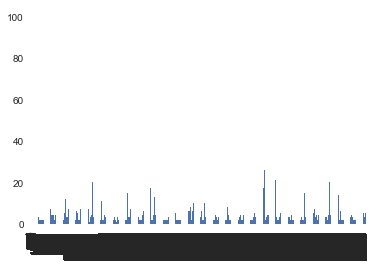

In [21]:
data['air_reserve']['reserve_visitors'].plot(kind='bar')

In [ ]:
data['air_reserve'].reserve_visitors.plot(kind = 'bar', color = 'y',label = 'Speed',linewidth=1,alpha = 0.9,grid = True,linestyle = ':')
data['hpg_reserve'].reserve_visitors.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data['air_reserve'], alpha=0.2, figsize=(8, 8), diagonal='kde')

### Data Structure

In [32]:
print('Training data....',data['train'].shape)
print('Unique store id in training data',len(data['train']['air_store_id'].unique()))
print('Id data....',data['store_id_relation'].shape)
print('Air store data....',data['air_store_info'].shape,'& unique-',data['air_store_info']['air_store_id'].unique().shape)
print('Hpg store data....',data['hpg_store_info'].shape,'& unique-',data['hpg_store_info']['hpg_store_id'].unique().shape)
print('Air reserve data....',data['air_reserve'].shape,'& unique-',data['air_reserve']['air_store_id'].unique().shape)
print('Hpg reserve data....',data['hpg_reserve'].shape,'& unique-',data['hpg_reserve']['air_store_id'].unique().shape)

Training data.... (252108, 3)
Unique store id in training data 829
Id data.... (150, 2)
Air store data.... (829, 5) & unique- (829,)
Hpg store data.... (63, 6) & unique- (63,)
Air reserve data.... (92378, 4) & unique- (314,)
Hpg reserve data.... (28183, 5) & unique- (150,)


### Time Series of dataset

In [33]:
#converting datetime to date for reservation data
for df in ['air_reserve','hpg_reserve']:
    data[df]['visit_datetime'] = pd.to_datetime(data[df]['visit_datetime'])
    data[df]['visit_hour'] = data[df]['visit_datetime'].dt.hour
    data[df]['visit_date'] = data[df]['visit_datetime'].dt.date
    data[df]['reserve_datetime'] = pd.to_datetime(data[df]['reserve_datetime'])
    data[df]['reserve_hour'] = data[df]['reserve_datetime'].dt.hour
    data[df]['reserve_date'] = data[df]['reserve_datetime'].dt.date
    
    data[df+'_hour'] = data[df]#keeping original
    
    #calculate reserve time difference and summarizing air_reserve,hpg_reserve to date
    data[df]['reserve_day_'+df] = data[df].apply(
        lambda r: (r['visit_date'] - r['reserve_date']).days, axis=1)
    data[df] = data[df].groupby(['air_store_id','visit_date'], as_index=False)[[
        'reserve_day_'+df, 'reserve_visitors']].sum().rename(columns={'reserve_visitors':'reserve_visitors_'+df})

In [34]:
data['air_reserve'].head(5)
# Reserve_day_air_reserve ==> nombre de jours entre la reservation et la visite

,air_store_id,visit_date,reserve_day_air_reserve,reserve_visitors_air_reserve
0,air_00a91d42b08b08d9,2016-10-31,0,2
1,air_00a91d42b08b08d9,2016-12-05,4,9
2,air_00a91d42b08b08d9,2016-12-14,6,18
3,air_00a91d42b08b08d9,2016-12-17,6,2
4,air_00a91d42b08b08d9,2016-12-20,2,4


In [ ]:
#breaking down dates on training data & summarizing 
data['train']['visit_date'] = pd.to_datetime(data['train']['visit_date'])
data['train']['day'] = data['train']['visit_date'].dt.day
data['train']['dow'] = data['train']['visit_date'].dt.weekday
#data['train']['dow_name'] = data['train']['visit_date'].dt.weekday_name
data['train']['year'] = data['train']['visit_date'].dt.year
data['train']['month'] = data['train']['visit_date'].dt.month
data['train']['week'] = data['train']['visit_date'].dt.week
data['train']['quarter'] = data['train']['visit_date'].dt.quarter
data['train']['visit_date'] = data['train']['visit_date'].dt.date
data['train']['year_mth'] = data['train']['year'].astype(str)+'-'+data['train']['month'].astype(str)

In [ ]:
#extracting store id and date info from test data
data['test']['air_store_id'] = data['test']['id'].map(lambda x: '_'.join(x.split('_')[:2]))
data['test']['visit_date'] = data['test']['id'].map(lambda x: str(x).split('_')[2])
data['test']['visit_date'] = pd.to_datetime(data['test']['visit_date'])
data['test']['day'] = data['test']['visit_date'].dt.day
data['test']['dow'] = data['test']['visit_date'].dt.weekday
#data['test']['dow_name'] = data['test']['visit_date'].dt.weekday_name
data['test']['year'] = data['test']['visit_date'].dt.year
data['test']['month'] = data['test']['visit_date'].dt.month
data['test']['week'] = data['test']['visit_date'].dt.week
data['test']['quarter'] = data['test']['visit_date'].dt.quarter
data['test']['visit_date'] = data['test']['visit_date'].dt.date
data['test']['year_mth'] = data['test']['year'].astype(str)+'-'+data['test']['month'].astype(str)

In [ ]:
print('Dates................')
print('train date- ,',data['train']['visit_date'].min(),' to ',data['train']['visit_date'].max())
print('test date - ,',data['test']['visit_date'].min(),' to ',data['test']['visit_date'].max())
print('holiday df- ,',data['date_info']['visit_date'].min(),' to ',data['date_info']['visit_date'].max())

## More explo

In [ ]:
data['train'].tail(5)
# add season ?

In [ ]:
#extract unique stores based on test data and populate dow 1 to 6
unique_stores = data['test']['air_store_id'].unique()#extract unique stores id from test data
#print("Nombre de restaurants uniques dans le test: ", len(unique_stores))

store_7days = pd.concat([pd.DataFrame({'air_store_id': unique_stores, 'dow': [i]*len(unique_stores)}) 
                    for i in range(7)], axis=0, ignore_index=True).reset_index(drop=True)
store_sum = pd.DataFrame({'air_store_id': unique_stores})

In [ ]:
store_7days.tail(4)

In [ ]:
store_sum.tail(5)

In [ ]:
# mapping train data dow to stores(test data) - min, mean, median, max, count 
tmp = data['train'].groupby(['air_store_id'], as_index=False)['visitors'].sum().rename(columns={'visitors':'total_visitors'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id']) 

tmp = data['train'].groupby(['air_store_id','dow'], as_index=False)['visitors'].mean().rename(columns={'visitors':'mean_visitors'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id','dow'])

tmp = data['train'].groupby(['air_store_id','dow'], as_index=False)['visitors'].median().rename(columns={'visitors':'median_visitors'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id','dow'])

tmp = data['train'].groupby(['air_store_id','dow'], as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id','dow'])

tmp = data['train'].groupby(['air_store_id','dow'], as_index=False)['visitors'].count().rename(columns={'visitors':'count_observations'})
store_7days = pd.merge(store_7days, tmp, how='left', on=['air_store_id','dow']) 

# map stores(test) to store genre and location detail
store_7days = pd.merge(store_7days, data['air_store_info'], how='left', on=['air_store_id']) 
#map to hpg genre and area
store_7days = pd.merge(store_7days, data['hpg_store_info'][['air_store_id','hpg_genre_name','hpg_area_name']], 
                       how='left', on=['air_store_id']) 

data['date_info']['visit_date'] = pd.to_datetime(data['date_info']['visit_date'])
data['date_info']['visit_date'] = data['date_info']['visit_date'].dt.date

hf=data['date_info']['holiday_flg']
dw=data['date_info']['day_of_week']
data['date_info']['long_wknd']=0

In [ ]:
store_7days.shape

In [ ]:
store_7days.tail(4)

In [ ]:
for i in range(len(data['date_info'])):
    if (hf[i]==1)&(dw[i]=='Friday'):
        data['date_info']['long_wknd'][i]=1
        data['date_info']['long_wknd'][i+1]=1
        data['date_info']['long_wknd'][i+2]=1
          
    if (hf[i]==1)&(dw[i]=='Monday'):
        data['date_info']['long_wknd'][i]=1
        data['date_info']['long_wknd'][i-1]=1
        data['date_info']['long_wknd'][i-2]=1

In [ ]:
train = pd.merge(data['train'], data['date_info'], how='left', on=['visit_date']) 
test = pd.merge(data['test'], data['date_info'], how='left', on=['visit_date']) 
train = pd.merge(train, store_7days, how='left', on=['air_store_id','dow']) 
test = pd.merge(test, store_7days, how='left', on=['air_store_id','dow'])

In [ ]:
for df in ['air_reserve','hpg_reserve']:
    train = pd.merge(train, data[df], how='left', on=['air_store_id','visit_date']) 
    test = pd.merge(test, data[df], how='left', on=['air_store_id','visit_date'])

In [ ]:
train = train.fillna(0) #change to one for algo training
test = test.fillna(0)
train['v_no_reservation']=train['visitors']-train['reserve_visitors_air_reserve']-train['reserve_visitors_hpg_reserve']

In [ ]:
train.tail(5)

In [ ]:
test.head(5)

In [ ]:
d = train['air_area_name'].value_counts()
print(len(d))

In [ ]:
print(len(store_7days.groupby(['latitude','longitude'])['latitude','longitude'].size().reset_index()), 'physical stores')

In [ ]:
store_7days

### TEST GET DUMMIES

In [ ]:
# DO NOT TAKE INTO CONSIDERATION

train4 = train.copy()
train4.dtypes
train4['air_genre_name'] = le.fit_transform(train4['air_genre_name'])
train4['air_area_name'] = le.fit_transform(train4['air_area_name'])
train4.tail(5)


air_area_name_ohe = pd.get_dummies(train2['air_area_name'])
train = train.drop('air_area_name', axis=1)
train = train.join(air_area_name_ohe)
train.head(5)


# DO NOT TAKE INTO CONSIDERATION
air_genre_name_ohe = pd.get_dummies(train['air_genre_name'])
train.drop('air_genre_name', axis=1)
train = train.join(air_genre_name_ohe)

### 25/01

In [ ]:
train[(train['hpg_genre_name'] != 0)].head(5)

In [ ]:
train3 = train.copy()
test3 = test.copy()

In [ ]:
train3[(train3['hpg_genre_name'] != 0)].head(5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train3['air_store_id'] = le.fit_transform(train3['air_store_id'])

In [ ]:
# GET DUMMIESOF :
train3['hpg_genre_name'].unique()
train3['hpg_area_name'].unique()

In [ ]:
train3 = pd.get_dummies(data=train3, columns=['air_genre_name', 'air_area_name','hpg_genre_name','hpg_area_name'])
train3.tail(5)

In [ ]:
d2 = train3['air_store_id'].value_counts()
print(len(d2))

In [ ]:
train3.dtypes

In [ ]:
#val = train3['hpg_genre_name'].unique()
#print(len(val))

In [ ]:
train3 = train3.drop(['visit_date','year_mth','day_of_week'], axis=1)
train3.dtypes

### START MODELLING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train3.shape

In [ ]:
test.shape

In [ ]:
test.head(4)

In [ ]:
train.head(5)

In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
X = train3.drop("visitors", axis=1)
y = test["visitors"]
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

In [ ]:
train3.dtypes

In [ ]:
train3.shape

In [ ]:
test.shape